## Question 1:

### *Using publicly available data (NBA.com, BasketballReference, etc.), explain who an undervalued asset on a current NBA roster is. Try to avoid choosing an all-star caliber player and present an analytically based argument as to why the player may have more value than perceived.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

Let's begin by loading in this season's advanced metric data from basketball reference. I will start by defining **undervalued**. In the context of my analysis, undervalued will be a player who is performing well in their time on the floor but not getting significant playing time. This naturally leads them to be undervalued by their coaching staff. The goal of this quick analysis is to determine if there is an outlying player playing a relatively small amount of minutes. The balance that must be struck is they cannot be playing such a small amount of minutes that their performance itself is an outlier when compared to their overall skill.

In [2]:
df = pd.read_csv('player_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             449 non-null    object 
 1   Pos                449 non-null    object 
 2   Age                449 non-null    int64  
 3   Tm                 449 non-null    object 
 4   G                  449 non-null    int64  
 5   MP                 449 non-null    int64  
 6   PER                449 non-null    float64
 7   TS%                441 non-null    float64
 8   3PAr               440 non-null    float64
 9   FTr                440 non-null    float64
 10  ORB%               449 non-null    float64
 11  DRB%               449 non-null    float64
 12  TRB%               449 non-null    float64
 13  AST%               449 non-null    float64
 14  STL%               449 non-null    float64
 15  BLK%               449 non-null    float64
 16  TOV%               441 non

There are 449 players currently with data for the 2022 season. Step one will be to remove unnamed columns 18 and 23 since they contain entirely null values.

In [4]:
df.drop(columns=['Unnamed: 18','Unnamed: 23'],inplace=True)

Step two will be to remove players who have NA values in TS%, 3PAr, and FTr because we will be using at least TS% to create the scoring method to do our analysis. This will hopefully bring our number of available players to 440.

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 448
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             440 non-null    object 
 1   Pos                440 non-null    object 
 2   Age                440 non-null    int64  
 3   Tm                 440 non-null    object 
 4   G                  440 non-null    int64  
 5   MP                 440 non-null    int64  
 6   PER                440 non-null    float64
 7   TS%                440 non-null    float64
 8   3PAr               440 non-null    float64
 9   FTr                440 non-null    float64
 10  ORB%               440 non-null    float64
 11  DRB%               440 non-null    float64
 12  TRB%               440 non-null    float64
 13  AST%               440 non-null    float64
 14  STL%               440 non-null    float64
 15  BLK%               440 non-null    float64
 16  TOV%               440 non

Next I am going to add a column that will correspond to the minutes per game each player plays. I will use this as the x-axis of the plots I make to try to find the outliers. 

In [7]:
df['MPG'] = df['MP']/df['G']

In [8]:
print('Mean MPG:',df['MPG'].mean())
print('Min MPG:',df['MPG'].min())
print('Max MPG:',df['MPG'].max())

Mean MPG: 19.539489916649
Min MPG: 1.0
Max MPG: 39.2


Now we know that the average MPG of a player in the 2022-2023 season is ~20 minutes and the minimum MPG played by any player is 1. In order to prevent garbage-time outliers from affecting the overall conclusions, I will cap the data we use to be players who have played at least 10 minutes per game and in at least 5 games.

In [9]:
players = df[(df['MPG'] >= 10) & (df['G'] > 5)]

In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 448
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             314 non-null    object 
 1   Pos                314 non-null    object 
 2   Age                314 non-null    int64  
 3   Tm                 314 non-null    object 
 4   G                  314 non-null    int64  
 5   MP                 314 non-null    int64  
 6   PER                314 non-null    float64
 7   TS%                314 non-null    float64
 8   3PAr               314 non-null    float64
 9   FTr                314 non-null    float64
 10  ORB%               314 non-null    float64
 11  DRB%               314 non-null    float64
 12  TRB%               314 non-null    float64
 13  AST%               314 non-null    float64
 14  STL%               314 non-null    float64
 15  BLK%               314 non-null    float64
 16  TOV%               314 non

There are now 337 players meeting our criteria for determining who is underrated.

I intend to normalize the values of particular columns of interest and then create a holistic score of each player by simply averaging their normalized values of those key columns. Instead of using everything available I will only use a subset. Because they project player value so well, the columns I'm most interested in are:
- PER
- TS%
- TRB%
- WS
- OBPM
- DBPM
- VORP

I will then plot this normalized score vs MPG to see if we can find any outliers. The goal of this is to see if someone has been contributing well while on the floor but playing fewer minutes per game. That, hopefully obviously, is the definition of being undervalued (assuming they're in condition to play more minutes per game).

In [11]:
results = players[['Player','MPG','PER','TS%','TRB%','WS','OBPM','DBPM','VORP']]

In [12]:
for col in results.columns[2:]:
    results[col] = (results[col] - results[col].min())/(results[col].max() - results[col].min())

In [13]:
results['Score'] = results[['PER','TS%','TRB%','WS','OBPM','DBPM','VORP']].mean(axis=1)

In [14]:
results

,Player,MPG,PER,TS%,TRB%,WS,OBPM,DBPM,VORP,Score
0,Precious Achiuwa,20.416667,0.443425,0.355691,0.558140,0.344828,0.375,0.246914,0.176471,0.357210
1,Steven Adams,26.909091,0.513761,0.510163,0.694352,0.448276,0.405,0.469136,0.294118,0.476401
2,Bam Adebayo,35.083333,0.513761,0.536585,0.392027,0.482759,0.385,0.580247,0.294118,0.454928
3,Ochai Agbaji,11.166667,0.217125,0.274390,0.189369,0.241379,0.235,0.000000,0.176471,0.190533
4,Santi Aldama,27.083333,0.406728,0.420732,0.318937,0.448276,0.400,0.481481,0.294118,0.395753
...,...,...,...,...,...,...,...,...,...,...
442,James Wiseman,13.800000,0.507645,0.630081,0.465116,0.310345,0.350,0.333333,0.235294,0.404545
443,Christian Wood,24.666667,0.623853,0.680894,0.558140,0.413793,0.530,0.333333,0.294118,0.490590
446,Thaddeus Young,10.777778,0.363914,0.189024,0.358804,0.275862,0.335,0.604938,0.235294,0.337548
447,Trae Young,34.909091,0.645260,0.394309,0.086379,0.482759,0.710,0.123457,0.470588,0.416107


Now let's scatter the MPG vs the Score to see if there are any outliers. I will annotate the plot for players who have played less than 25 minutes per game with a score of greater than 0.55 to try to narrow down the selection of undervalued players.

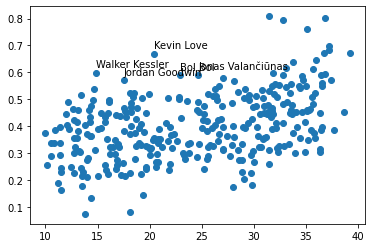

In [15]:
plt.scatter(results['MPG'],results['Score'])

for ii in range(len(results.index)):
    if (results['Score'].iloc[ii] > 0.55) & (results['MPG'].iloc[ii] < 25):
        plt.annotate(results['Player'].iloc[ii], (results['MPG'].iloc[ii], results['Score'].iloc[ii] + 0.02))

In [16]:
results.loc[(results['Score']>0.55) & (results['MPG']<25),'Player']

42               Bol Bol
138       Jordan Goodwin
219       Walker Kessler
248           Kevin Love
408    Jonas Valančiūnas
Name: Player, dtype: object

It turns out there are 5 players that meet our threshold for being undervalued. I would argue that Jonas Valanciunas and Kevin Love are all-star level players so I will exclude them from being considered per the prompt of the question. That leaves Walker Kessler, Jordan Goodwin, and Bol Bol.

In [17]:
players.loc[players['Player'] == 'Walker Kessler']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional,MPG
219,Walker Kessler,C,21,UTA,10,149,23.0,0.725,0.0,0.457,...,0.5,0.2,0.8,0.243,1.7,2.2,3.9,0.2,kesslwa01,14.9


In [18]:
players.loc[players['Player'] == 'Jordan Goodwin']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional,MPG
138,Jordan Goodwin,PG,24,WAS,6,105,20.8,0.696,0.32,0.08,...,0.3,0.1,0.5,0.207,2.9,3.5,6.5,0.2,goodwjo01,17.5


In [19]:
players.loc[players['Player'] == 'Bol Bol']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional,MPG
42,Bol Bol,PF,23,ORL,12,275,20.9,0.747,0.2,0.313,...,0.6,0.4,1.0,0.171,1.7,1.2,2.9,0.3,bolbo01,22.916667


Given the results from the quick analysis I did - I would say that Walker Kessler is undervalued. In 10 games he has only avergaged 14.9 minutes but has really taken advantage of his time on the floor for Utah. In order to do a sanity check on my scoring system let's see who the top 30 performing players were by the overall metric.

In [20]:
results.sort_values(by='Score',ascending = False).head(30)

,Player,MPG,PER,TS%,TRB%,WS,OBPM,DBPM,VORP,Score
206,Nikola Jokić,31.454545,0.899083,0.727642,0.498339,0.931034,0.770,0.950617,0.882353,0.808438
103,Luka Dončić,36.818182,0.987768,0.554878,0.375415,1.000000,0.880,0.814815,1.000000,0.801839
10,Giannis Antetokounmpo,32.777778,1.000000,0.571138,0.554817,0.793103,0.830,1.000000,0.823529,0.796084
88,Stephen Curry,35.100000,0.932722,0.745935,0.302326,0.896552,1.000,0.506173,0.941176,0.760698
112,Kevin Durant,37.166667,0.847095,0.652439,0.249169,0.896552,0.785,0.580247,0.882353,0.698979
392,Jayson Tatum,37.181818,0.840979,0.676829,0.269103,0.862069,0.840,0.469136,0.823529,0.683092
135,Shai Gilgeous-Alexander,36.700000,0.896024,0.628049,0.129568,0.827586,0.790,0.679012,0.764706,0.673564
281,Donovan Mitchell,39.200000,0.785933,0.674797,0.132890,0.896552,0.830,0.567901,0.823529,0.673086
248,Kevin Love,20.454545,0.694190,0.674797,0.664452,0.586207,0.805,0.666667,0.588235,0.668507
62,Jimmy Butler,36.000000,0.767584,0.579268,0.269103,0.827586,0.710,0.654321,0.705882,0.644821


There are quite a few recognizable names at the top there which is a good thing - it leads me to believe the methodology I used to score players is a credible means of evaluation. I am therefore confident in saying Walker Kessler is currently undervalued.

## Question 2:

### *Using publicly available data (NBA.com, BasketballReference, etc.), which NBA team has experienced the largest change both in play style and in performance in the 2022-23 season compared to last season?*

Let's begin by loading the data in for this season's per 100 possession data and last season's per 100 possession data. We should then be able to manipulate it to create a similarity score between the different teams when comparing this season to last.

In [21]:
this_szn = pd.read_csv('2022_team_stats_per100.csv')
last_szn = pd.read_csv('2021_team_stats_per100.csv')

In [22]:
this_szn.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

We'll keep all columns that have some bearing on either playstyle or performance. We will then correct the sign of Personal Fouls and TOVs with the logic being that a negative change in both of these categories is a positive thing.

In [23]:
cols_to_keep = ['Team',
                'FG',
                'FGA',
                'FG%',
                '3P',
                '3PA',
                '3P%',
                '2P',
                '2PA',
                '2P%',
                'FT',
                'FTA',
                'FT%',
                'ORB',
                'DRB',
                'TRB',
                'AST',
                'STL',
                'BLK',
                'TOV',
                'PF',
                'PTS']

In [24]:
this_szn = this_szn[cols_to_keep]
this_szn.set_index('Team',inplace = True)
this_szn['TOV'] = -this_szn['TOV']
this_szn['PF'] = -this_szn['PF']

last_szn = last_szn[cols_to_keep]
last_szn.set_index('Team',inplace = True)
last_szn['TOV'] = -last_szn['TOV']
last_szn['PF'] = -last_szn['PF']

Similar to what we did for the player evaluation, we will normalize each of the columns to ensure the magnitude of each effect is equivalent across the various metrics.

In [25]:
for col in this_szn.columns:
    this_szn[col] = (this_szn[col] - this_szn[col].min())/(this_szn[col].max() - this_szn[col].min())
    
for col in last_szn.columns:
    last_szn[col] = (last_szn[col] - last_szn[col].min())/(last_szn[col].max() - last_szn[col].min())

Here I am splitting up the dataset into two distinct frames. The first will be a playstyle dataframe that contains information about how each individual team is playing this season. The columns to use there are field goal attempts, three point attempts, two point attempts, free throw attempts, and personal fouls. These columns cover *how* a team is playing.

The next dataframe will cover performance criteria such as field goal percentages, rebounding, assists, etc. These columns cover *how well* a team is playing. 

In [26]:
playstyle_cols = ['FGA','3PA','2PA','FTA','PF']
performance_cols = ['FG%','3P%','2P%','FT%','TRB','AST','STL','BLK','TOV','PTS']

Now we will compare performance from this season to last season by subtracting the two dataframes from each other and tabulating the score. For the playstyle comparison I am not making any assumptions about the directionality of the changes being positive or negative. I will therefore sum the magnitude of the changes. 

For the performance comparison, directionality is important (because scoring less points is objectively worse than scoring more points), so I will be keeping the signs of the changes when summing across.

In [27]:
playstyle_comparison = this_szn[playstyle_cols] - last_szn[playstyle_cols]
performance_comparison = this_szn[performance_cols] - last_szn[performance_cols]

In [28]:
playstyle_comparison['Change'] = playstyle_comparison.abs().sum(axis=1)
performance_comparison['Change'] = performance_comparison.sum(axis=1)

As you can see from the table below, the Warriors are playing the most similar to how they were last season and the Magic are playing the most differently. The Magic are taking less field goals and threes, shooting more twos and free throws, and taking less fouls than they did in 2021-2022.

In [29]:
playstyle_comparison.sort_values('Change')

,FGA,3PA,2PA,FTA,PF,Change
Team,,,,,,
Golden State Warriors,0.041474,0.012027,0.091443,-0.013185,-0.176550,0.334678
Washington Wizards,0.086139,0.013815,-0.026029,-0.146397,-0.162174,0.434554
Miami Heat,0.081078,-0.039349,0.096951,0.053194,0.214735,0.485306
Toronto Raptors,-0.039604,0.116073,-0.182057,0.108206,-0.136568,0.582508
Cleveland Cavaliers,0.058856,0.029481,-0.008172,-0.025460,-0.579964,0.701933
Chicago Bulls,-0.054895,0.141791,-0.217590,0.127074,-0.190925,0.732276
Los Angeles Lakers,0.134213,-0.111509,0.131872,-0.209820,0.145553,0.732967
Detroit Pistons,-0.002530,-0.000925,-0.024301,0.509434,0.207547,0.744737
Milwaukee Bucks,0.201540,0.077094,0.077690,-0.182087,-0.235400,0.773811


As you can see from the table below the Hornets are performing the worst when compared to last season and the Magic are performing the best. 

In [30]:
performance_comparison.sort_values('Change')

,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS,Change
Team,,,,,,,,,,,
Charlotte Hornets,-0.480383,-0.435039,-0.400452,-0.250000,0.184376,-0.326639,-0.285714,0.022333,-0.341905,-0.622502,-2.935926
Memphis Grizzlies,0.028469,0.196569,0.117949,-0.175457,-0.297297,-0.135657,-0.821429,-0.538462,-0.301905,-0.040198,-1.967418
San Antonio Spurs,-0.093780,0.159308,0.109502,-0.303680,-0.398371,0.086207,0.013393,-0.285360,-0.760952,-0.209185,-1.682918
Golden State Warriors,-0.051196,-0.212458,0.230769,0.038444,-0.576083,-0.044146,-0.464286,-0.227047,-0.105714,-0.046149,-1.457866
Philadelphia 76ers,-0.194019,-0.062852,-0.008145,-0.398734,-0.112181,0.121448,0.066964,-0.305831,-0.189524,-0.189760,-1.272633
Miami Heat,-0.356938,-0.645669,0.022926,0.120370,-0.371714,-0.133952,0.191964,0.000000,0.310476,-0.308893,-1.171429
Los Angeles Lakers,-0.445933,-0.428571,-0.122323,0.292429,0.131803,0.089807,0.062500,-0.157568,-0.016190,-0.475410,-1.069457
Los Angeles Clippers,0.175120,-0.572132,0.772398,-0.557196,-0.105023,-0.136036,0.098214,0.009305,-0.351429,-0.322030,-0.988809
Atlanta Hawks,-0.174641,-0.587880,0.034691,-0.195148,0.070097,0.022736,0.142857,0.138958,-0.060000,-0.374018,-0.982347


Since the **Magic** are both playing the most differently and performing the best when compared to last season I choose them as the team who has experienced both the largest change in playstyle and performance!

## Question 3:

### Without preforming the actual data engineering/science portion, explain your thought process for answering the following question: How would you go about designing a model to predict if a player will get injured and the severity of the injury? What data would you utilize and what techniques would you apply?

This is a very interesting question. The first step in any model building process is to obtain relevant data. In this case, I would have conversations with team doctors about what factors they thought played a role in player injuries. Since I am not a doctor, I can only speculate about this point but I am assuming we would be able to use some of the players combine testing data (since it covers general atheticism), injury history, and results from the physical the team was able to perform on him. The outcome variable of interest in this case would be "time missed due to injury". Since a time of 0 would correspond to a player not getting injured and the time a player had to miss covers the severity of the injury this metric actually covers both questions. 

At this point, we would need to build a training data set which utilizes players who have gotten and who have not gotten injured. From there, we will take all of the relevant data about the Pacers' past players and use it to build a model. To do this, I would split the data we have into 70%-30% training testing (or 80%-20% depending on how much data are available) and build a series of models to predict how severe a player injury would be given the above characteristics. I would evaluate how each model performs using residual information from the testing data (i.e. how well the model predicted the injury time compared to the actual injury time). Once I compared all the models to each other, I would then have another discussion with both the team and team doctors to ensure that I wasn't missing any key elements. The types of models I would use would range from a classic OLS regression to a neural network including techniques such as decision trees, random forests, etc. 